In [1]:
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Collected Notes
### 1. Python in the lab

In [2]:
data_mat = 'fisheriris.mat'
data = loadmat(data_mat)

In [3]:
# check loaded data
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'species', 'meas'])

In [4]:
col = ['sepal_length','sepal_width','petal_length','petal_width']

# Create Dataframe
df = pd.DataFrame(data['meas'], columns=col)
df['specie'] = [e[0][0] for e in data['species']]

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,specie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


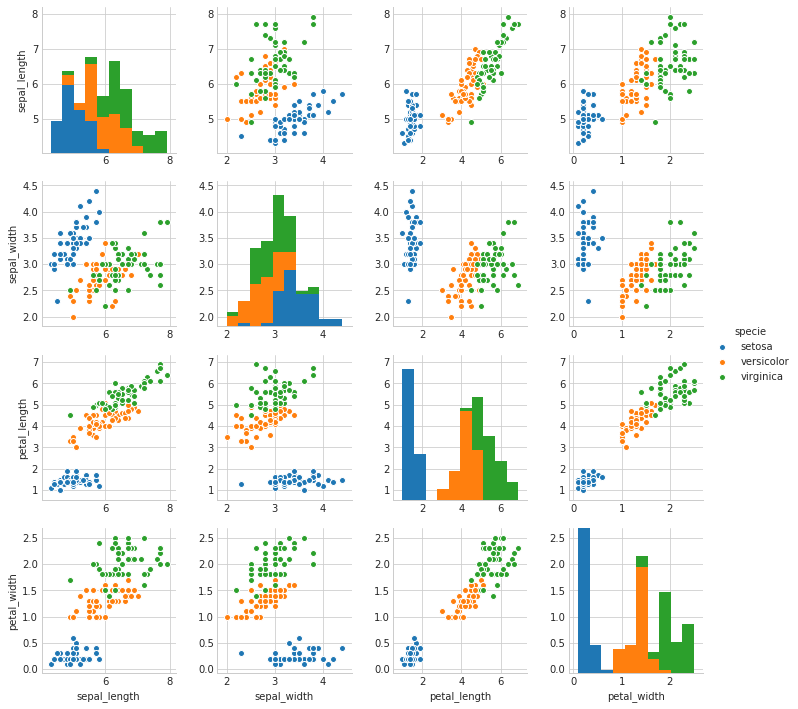

In [6]:
plot_1 = 'cn_out.png'

sns.set_style("whitegrid")
sns_plot = sns.pairplot(df,hue="specie",size=2.5);
sns_plot.savefig(plot_1)
plt.show()

### Generate docx file

In [59]:
import docx
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.style import WD_STYLE_TYPE

# Open MSWord template
tpl_rpt = 'rpt_template.docx'
out_rpt = 'reporte.docx'
plot_1 = 'cn_out.png'

In [61]:
doc = docx.Document(tpl_rpt)

# Get Header
section = doc.sections[0]
header = section.header
paragraph = header.paragraphs[0]

# Add Header Text using template
paragraph.runs[1].text = 'Header - Titulo del reporte'
paragraph = header.paragraphs[0]

doc.add_heading('Reporte Mediciones', level=1)
# Add Plots
doc.add_heading(f'Dataset: {data_mat}', level=3)
doc.add_picture(plot_1, width=Inches(6))

doc.save(out_rpt)